Unzip complete
converting images to string
Append dictionary with data from:a-0.png
converting images to string
Append dictionary with data from:a-1.png
converting images to string
Append dictionary with data from:a-2.png
converting images to string
Append dictionary with data from:a-3.png
Results found ina-0.png
[[3109, 1696, 354, 354], [1954, 1867, 253, 253], [1135, 1978, 253, 253], [2557, 1966, 181, 181], [1167, 2020, 181, 181], [1682, 2035, 181, 181], [2631, 3022, 354, 354]]


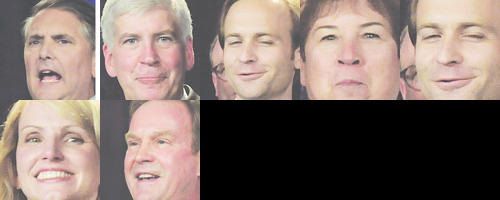

No results
No results
Results found ina-3.png
[[1805, 1405, 181, 181], [1938, 1781, 66, 66]]


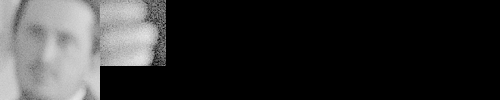

In [151]:
import sys
# !{sys.executable} -m pip install pytesseract opencv-python numpy
import zipfile
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
from IPython.display import display
# loading the face detection classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

name_list = []
archive_index = {}
def access_zipfile():
    archive = zipfile.ZipFile("small_img.zip", mode='r')
    try:
        archive.extractall()
        images = [item for item in archive.namelist()]
        name_list.append(images)
    except Exception as e:
        print(e)
    print("Unzip complete")
access_zipfile()


def strip_string(images):
    for image in images: 
        print("converting images to string")
        img = Image.open(image)
        img = pytesseract.image_to_string(img).replace('\n','')
        try:
            archive_index[image] = img
            name_list.append(local_list)
        except Exception as e:
            print(e)
        print("Append dictionary with data from:" + image)
strip_string(name_list[0])


def search_img(text):
    for k,v in archive_index.items():
        if text in v:
            print('Results found in' + k)
            
            try:
                img = Image.open(k)
                faces = (face_cascade.detectMultiScale(np.array(img),1.4,5)).tolist()
                faces_in_each = []
                print(faces)
                
            except Exception as e:
                print(e)
                
            try:
                for x,y,w,h in faces:
                        faces_in_each.append(img.crop((x,y,x+w,y+h)))
                contact_sheet = Image.new(img.mode, (500,100*int(np.ceil(len(faces_in_each)/5))))
                x = 0
                y = 0
            except Exception as e:
                print(e)
                
            try:
                for face in faces_in_each:
                    face.thumbnail((100,100))
                    contact_sheet.paste(face, (x, y))

                    if x+100 == contact_sheet.width:
                        x=0
                        y=y+100
                    else:
                        x=x+100

                display(contact_sheet)            
            except:
                print("fail")
        else:
            print("No results")
search_img("Chris")